분류~lasso회귀까지

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import scipy.stats as stats 

from IPython.display import set_matplotlib_formats

mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus =True)
set_matplotlib_formats('retina')
pd.options.display.max_columns = 100
pd.options.display.max_rows = 1000
import warnings 
warnings.filterwarnings('ignore')


# 학습/검증 데이터 분할 / 매개변수 튜닝 / 교차검증 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# 평가 
from sklearn.metrics import classification_report


C:\Users\user\AppData\Local\Temp/ipykernel_3524/2949398509.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


## 생선 분류

In [3]:
#도미  데이터
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

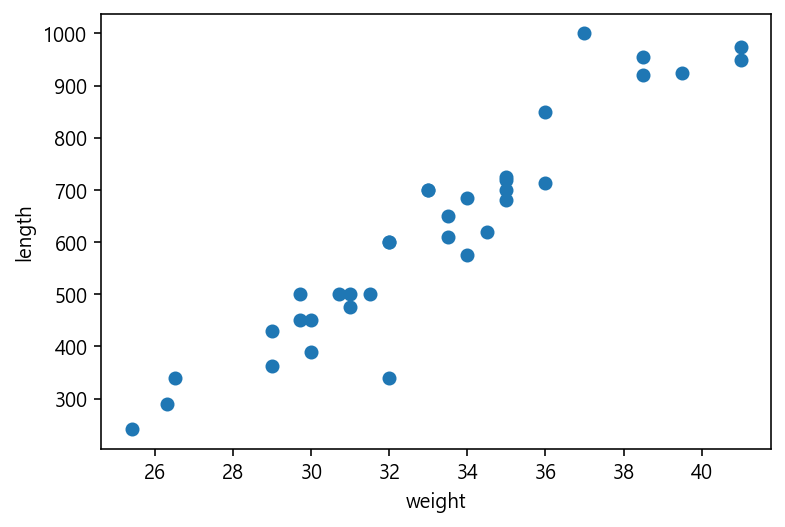

In [4]:
plt.scatter(bream_length,bream_weight)
plt.xlabel('weight')
plt.ylabel('length')
plt.show()

In [5]:
#빙어 데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

__2개의 그래프를 한장에 그리고 싶을때는 연달아서 사용__

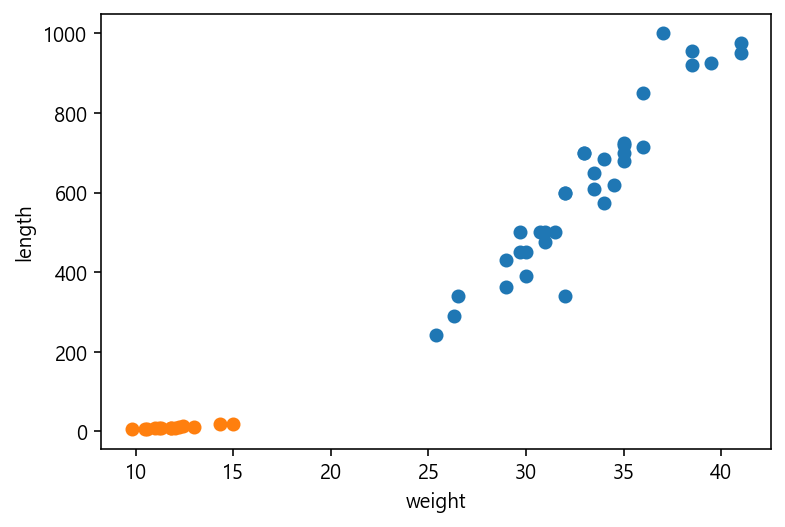

In [6]:
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.xlabel('weight')
plt.ylabel('length')
plt.show()


## 머신러닝 해보기

In [7]:
length = bream_length+smelt_length
weight = bream_weight+smelt_weight

In [8]:
fish_data = pd.DataFrame(length,weight)

In [9]:
fish_data = fish_data.reset_index()

In [10]:
fish_data.columns=['weight','length']

In [11]:
fish_data.value

AttributeError: 'DataFrame' object has no attribute 'value'

In [ ]:
# dataframe을 배열로 변환 --> values 함수
fish_data_ml = fish_data.values

In [ ]:
fish_data_ml

In [ ]:
fish_target=[1]*35 + [0]*14
print(fish_target)

__K-최근접 이웃 알고리즘__
- 특정 데이터의 답을 구할 때 주위의 다른 데이터를 기반으로 다수의 데이터를 차지하는 것을 정답으로 사용하는 알고리즘
- 새로운 데이터에 대해 예측할 때는 가장 가까운 직선거리에 어떤 데이터가 있는지 살피기만 하면 된다  
- 데이터가 아주 많은 경우 메모리가 많이 필요하고 직선거리를 계산하는 데도 많은 시간이 필요하다는 단점이 있다.

__KNeighborsClassifier()__

- n_neighbors 매개변수로 이웃의 개수를 지정(기본값 5)
- p 매개변수로 직선거리를 재는 방법을 지정(기본값 2)
  - 1일 경우: 맨해튼 거리 공식
  - 2일 경우: 유클리디안 거리 공식
- n_jobs 매개변수로 cpu 코어 지정(기본값 1)
  - -1일때 모든 cpu 사용

In [ ]:
# k-최근접 이웃 분류
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#모델 객체 생성
knc = KNeighborsClassifier()

In [ ]:
#머신러닝 훈련
knc.fit(fish_data_ml,fish_target)

In [ ]:
#분류 점수 출력(accuracy)
knc.score(fish_data_ml,fish_target)

In [ ]:
knc.predict([[30, 600]])

In [ ]:
print(knc._fit_X)

In [ ]:
print(knc._y)

In [ ]:
# 참조 데이터(n_neighbors)를 전체 데이터 개수인 49개로 설정
knc49 = KNeighborsClassifier(n_neighbors=49)

In [ ]:
knc49.fit(fish_data_ml,fish_target)
knc49.score(fish_data_ml,fish_target)

train set,test set 나눠서 머신러닝 해보기

In [12]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()

In [14]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

In [15]:
train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

In [16]:
# 샘플링을 편향되게 해서 정확도가 0이 나옴 
knc = knc.fit(train_input,train_target)
knc.score(test_input,test_target)

0.0

In [17]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [18]:
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [19]:
print(input_arr.shape)

(49, 2)


In [20]:
np.random.seed(42)
index=np.arange(49)
np.random.shuffle(index)
index

array([13, 45, 47, 44, 17, 27, 26, 25, 31, 19, 12,  4, 34,  8,  3,  6, 40,
       41, 46, 15,  9, 16, 24, 33, 30,  0, 43, 32,  5, 29, 11, 36,  1, 21,
        2, 37, 35, 23, 39, 10, 22, 18, 48, 20,  7, 42, 14, 28, 38])

__train,test set 랜덤 분할__

In [21]:
train_input=input_arr[index[:35]]
train_target=target_arr[index[:35]]

In [22]:
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


In [23]:
test_input=input_arr[index[35:]]
test_target=target_arr[index[35:]]

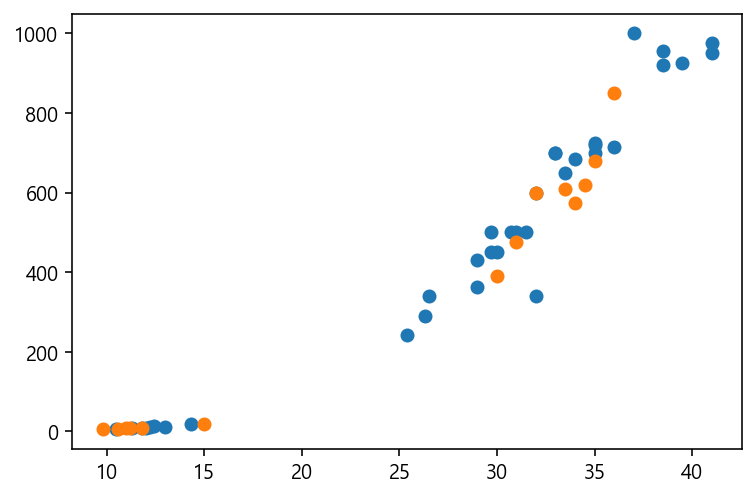

In [24]:
#제대로 분할 되었는지 확인
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])

In [25]:
train_target

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1])

In [26]:
knc = knc.fit(train_input, train_target)

In [27]:
knc.score(test_input, test_target)

1.0

In [28]:
knc.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [29]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

## data preprocessing

In [30]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [31]:
fish_data=np.column_stack((fish_length,fish_weight))

In [32]:
# numpy concat, zeros, ones로 target data 생성
fish_target = np.concatenate((np.ones(35),np.zeros(14)))

In [33]:
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

__사이킷 런으로 data set 분할__

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42)

In [36]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [37]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [38]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42)

In [39]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


__knn 머신러닝__

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(train_input,train_target)

KNeighborsClassifier()

In [41]:
knc.score(test_input,test_target)

1.0

In [42]:
print(knc.predict([[25, 154]]))

[0.]


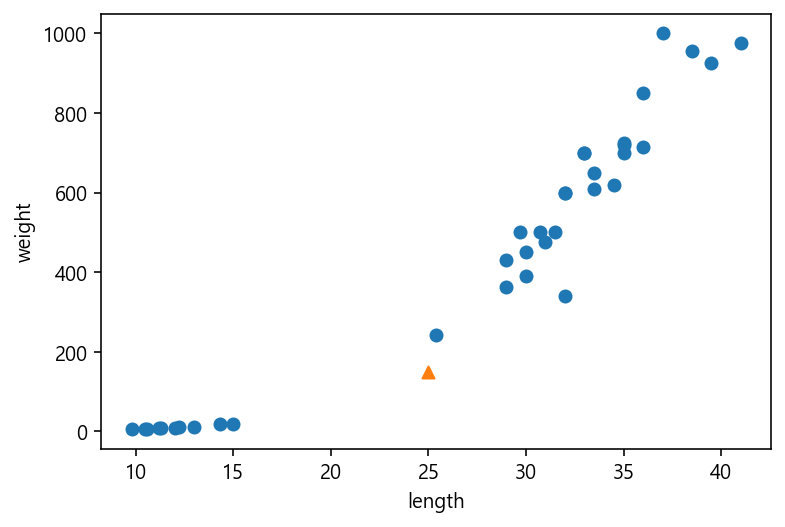

In [43]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [44]:
#kneighbors():주어진 샘플에서 가장 가까운 샘플을 찾아줌(기본값:5)
distances, indexes = knc.kneighbors([[25,150]])

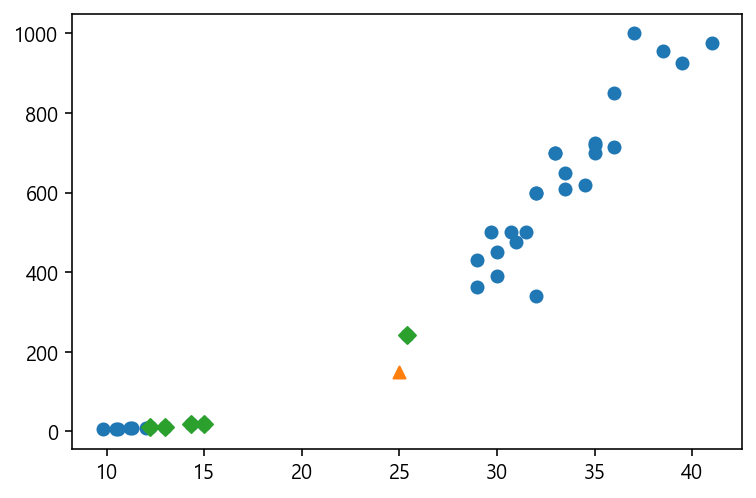

In [45]:
# scatter marker--> ^(삼각형),D(마름모)
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')


In [46]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [47]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [48]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


__데이터 전처리__

- feature값을 일정한 기준으로 맞춰주는 것

__표준점수(z score)__

- 각 feature 값이 원점에서 몇 표준편차 만큼 떨어져 있는지를 나타내는 점수

(0.0, 1000.0)

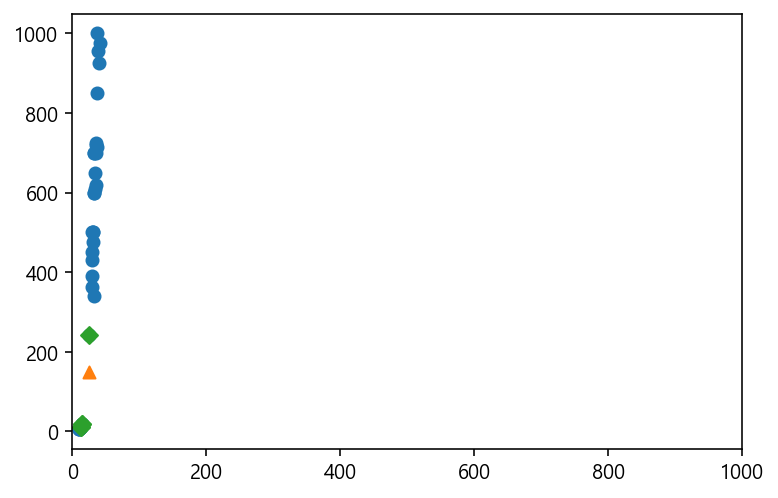

In [49]:
# scatter marker--> ^(삼각형),D(마름모)
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlim(0,1000)

In [50]:
mean = np.mean(train_input,axis=0)
std = np.std(train_input,axis=0)

In [51]:
print(mean,std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


**Standatd Scale**

- (x-평균)/표준편차

In [52]:
train_scale = (train_input-mean)/std

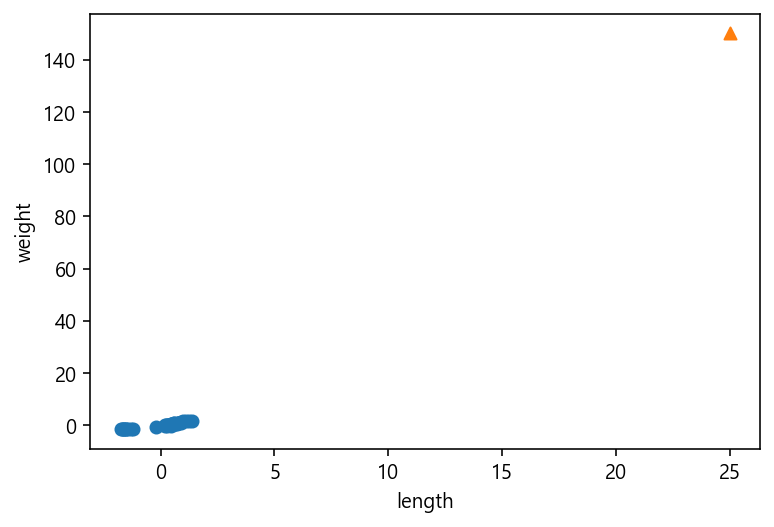

In [53]:
# 샘플을 동일한 비율로 변환해야함
plt.scatter(train_scale[:,0], train_scale[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

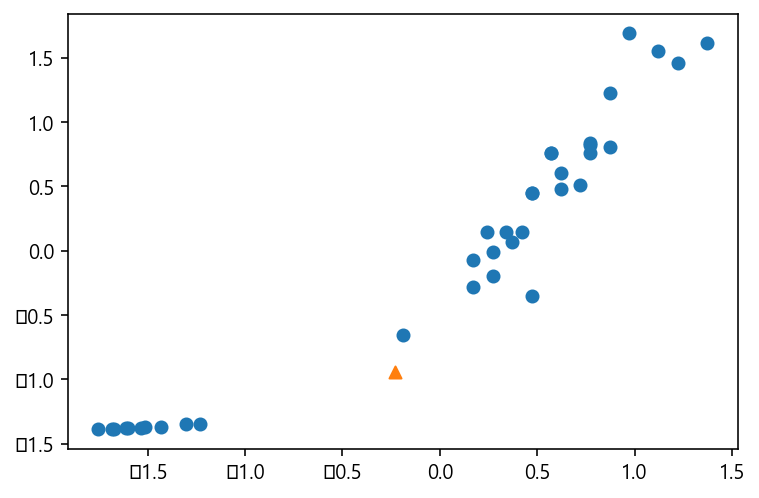

In [54]:
# train set의 feature가 비슷한 범위를 차지하고 있다
new = ([25,150]-mean)/std
plt.scatter(train_scale[:,0],train_scale[:,1])
plt.scatter(new[0],new[1],marker='^')

In [55]:
knc.fit(train_scale,train_target)

KNeighborsClassifier()

In [56]:
test_scale = (test_input-mean)/std

In [57]:
knc.score(test_scale,test_target)

1.0

In [58]:
# scaling후 도미(1)로 예측하는 것으로 바뀜
print(knc.predict([new]))

[1.]


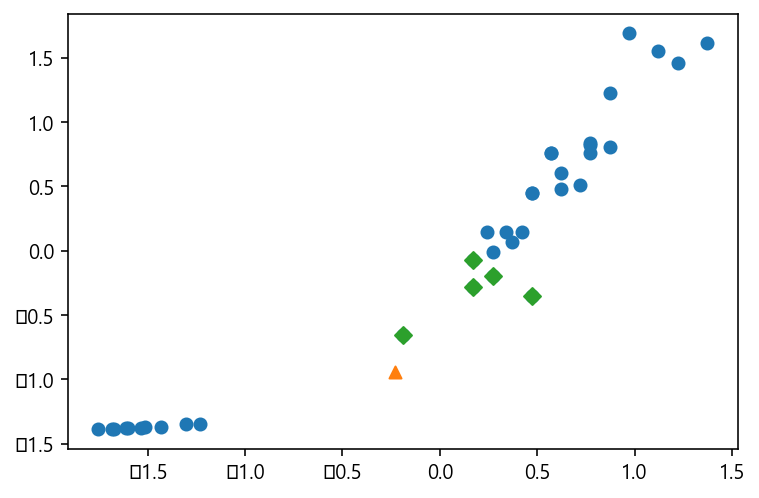

In [59]:
distances,indexes = knc.kneighbors([new])
plt.scatter(train_scale[:,0],train_scale[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.scatter(train_scale[indexes,0], train_scale[indexes,1], marker='D')

## 회귀 분석

**농어의 무게 예측**

__KNN(k-최근접 이웃) 알고리즘 분류__

- 예측하려는 샘플에 가장 가까운 샘플 k개를 선택
- 샘플들의 클래스를 확인 후 다수인 클래스를 새로운 샘플의 클래스로 예측

__KNN(k-최근접 이웃) 알고리즘 회귀__

- 예측하려는 샘플에 가장 가까운 샘플 k개를 선택
- 샘플들의 수치들을 확인 후 해당 수치들의 평균을 타깃값으로 설정

In [60]:
#농어의 길이와 무게 설정
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

<AxesSubplot:>

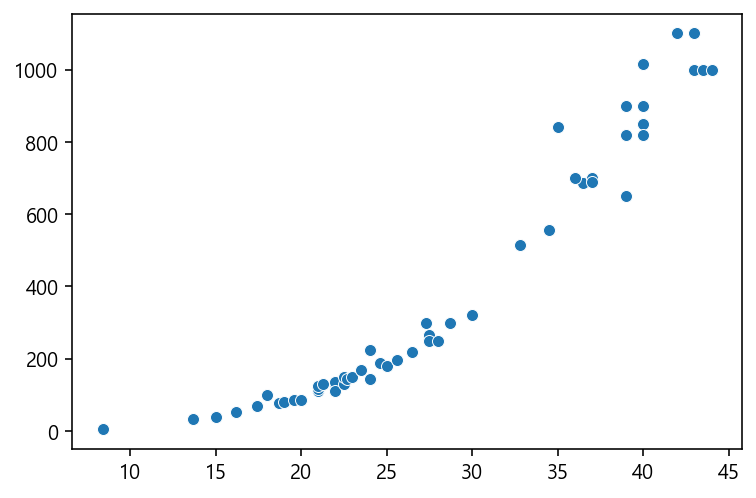

In [61]:
sns.scatterplot(perch_length,perch_weight)

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

In [64]:
## 사이킷런 사용을 위해 데이터를 2차원 배열로 변환
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [65]:
print(train_input.shape,test_input.shape)

(42, 1) (14, 1)


## 결정계수($ R^2$) 구하기

#### 결정계수($ R^2$)란?

- 회귀식이 얼마나 정확한지 나타내는 숫자

In [66]:
from sklearn.neighbors import KNeighborsRegressor 

In [67]:
knr = KNeighborsRegressor()

In [68]:
knr.fit(train_input,train_target)

KNeighborsRegressor()

In [69]:
print(knr.score(test_input,test_target))

0.992809406101064


In [70]:
from sklearn.metrics import mean_absolute_error

In [71]:
test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target,test_prediction)
print(mae)

19.157142857142862


### 과대적합,과소적합
**과대적합**
- train set에서만 점수가 높을때 모델이 과대적합 되었다고 함  

**과소적합**
- test set에서만 점수가 높거나 두 set 모두 점수가 낮을때 모델이 과소적합 됐다고 함

In [72]:
# train set이 더 낮은 과소적합 발생
print(knr.score(train_input,train_target))

0.9698823289099254


In [73]:
# 근접 샘플수를 3으로 줄임
knr.n_neighbors=3

In [74]:
knr.fit(train_input,train_target)
print(knr.score(train_input,train_target))

0.9804899950518966


### knn 회귀 연습

In [75]:
#회귀 객체 생성
knr =KNeighborsRegressor()
# 5~45까지 x 좌표 범위 생성
x=np.arange(5,45).reshape(-1,1)

In [76]:
# n=1,5,10일때 예측 결과
for n in [1,5,10]:
    #모델 ㅎ훈련
    knr.n_neighbors=n
    knr.fit(train_input,train_target)
    #모델 범위 예측
`   prediction=knr.predict(x)
    plt.scatter(train_input,train_target)
    plt.plot(x,prediction)
    plt.title('n_neighbors = {}'.format(n))    
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()
    

SyntaxError: invalid syntax (Temp/ipykernel_3524/1410387728.py, line 7)

## 선형 회귀

In [77]:
#농어의 길이와 무게 설정
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
)
    

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train,X_test,y_train,y_test=train_test_split(perch_length,perch_weight,random_state=42)

In [80]:
# 1차원 데이터 2차원 배열로 분할
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)

In [81]:
knr=KNeighborsRegressor(n_neighbors=3)
knr.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [82]:
print(knr.predict([[50]]))

[1033.33333333]


In [83]:
distances,indexes = knr.kneighbors([[50]])

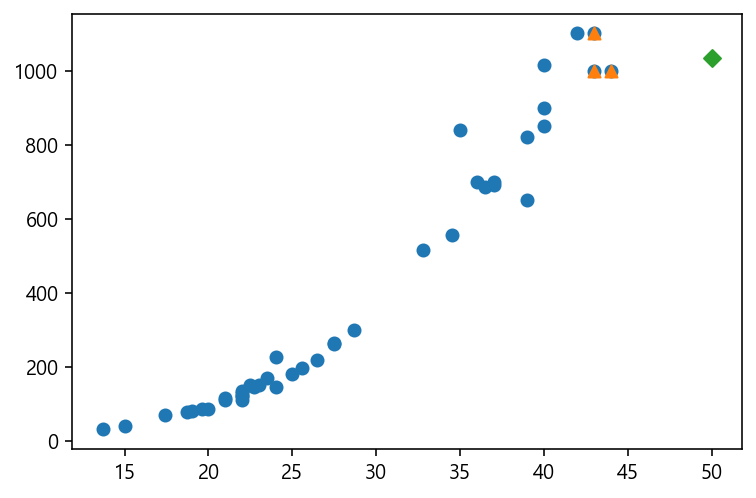

In [84]:
plt.scatter(X_train,y_train)
## train set중 길이 50인 농어와 이웃하는 샘플만 ^(삼각형)표시
plt.scatter(X_train[indexes],y_train[indexes],marker='^')
#50cm 농어 데이터
plt.scatter(50,1033,marker='D')

__농어의 길이가 커질수록 무게도 증가__

In [85]:
print(np.mean(y_train[indexes]))

1033.3333333333333


In [86]:
print(knr.predict([[1000]]))

[1033.33333333]


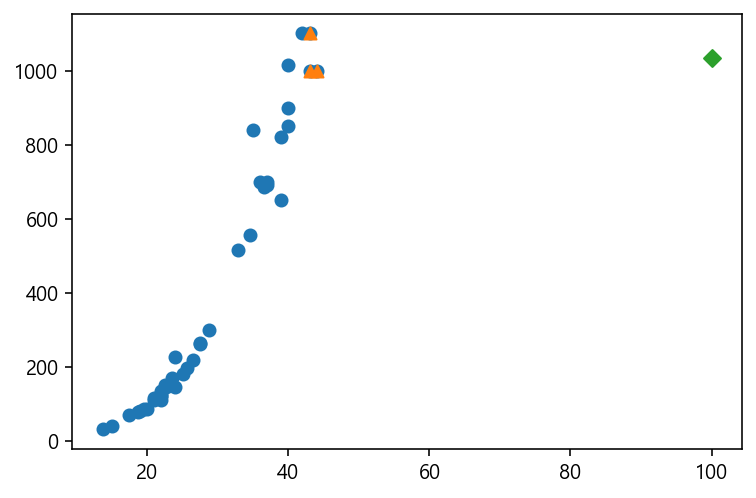

In [87]:
plt.scatter(X_train,y_train)
## train set중 길이 100인 농어와 이웃하는 샘플만 ^(삼각형)표시
plt.scatter(X_train[indexes],y_train[indexes],marker='^')
#100cm 농어 데이터
plt.scatter(100,1033,marker='D')

__KNN 알고리즘은 가장 가까운 샘플을 찾아 타깃을 평균하기 때문에 새로운 샘플이 train set의 범위를 벗어나면 엉뚱한 값을 예측할 수도 있다.__

## 선형 회귀(linear regression)

- 운동시간이 늘어날수록 몸무게는 줄어들고, 오랜 시간 일할수록 소득은 늘어난다. 이 것을 수학적으로 표현하면 어떤 요인의 수치에 따라서 요인의 수치가 영향을 받고있다고 할 수 있다. 

- 다시 말해 어떤 변수의 값에 따라서 특정 변수의 값이 영향을 받고 있다고 볼 수 있다.
  다른 변수의 값을 변하게 만드는 변수를 x, 변수 x에 의해 값이 종속적으로 변하는 수를   y라고 할 때, x의 값은 독립적으로 변할 수 있지만 y의 값은 x에 의해 종속적으로 변하게 된다.
  
- 이 때 x를 독립변수 y를 종속변수라고 하는데 선형 회귀는 한개 이상의 독립 변수 x와 y의 선형 관계를 모델링하는것을 말한다.

### 단순 선형 회귀(simple linear regression)
       
   
  
__y=wx+b__

- 독립 변수가 x가 1개일 경우 이를 단순 선형 회귀라 일컫는데 위의 수식은 단순 선형 회귀를 나타낸 것이다. 
- 독립 변수 x와 곱해지는 값 w를 머신 러닝에서는 가중치(weight), 별도로 더해지는 값 b를 편향(bias)라고 한다.

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
lr =LinearRegression()

In [90]:
lr.fit(X_train,y_train)

LinearRegression()

In [91]:
lr.score(X_test,y_test)

0.8247503123313559

In [92]:
lr.predict([[50]])

array([1241.83860323])

In [93]:
print(lr.coef_,lr.intercept_)

[39.01714496] -709.0186449535477


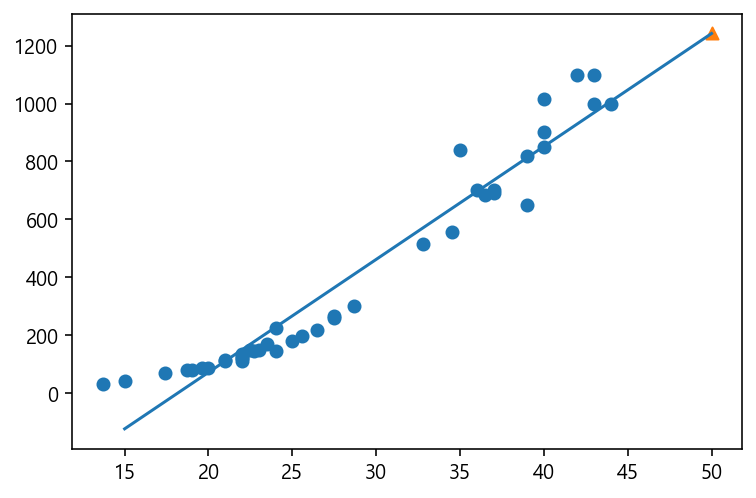

In [94]:
#train set 산점도
plt.scatter(X_train,y_train)
#linear regression 결과 나온 가중치,절편으로 직선 생성(농어의 길이:15~50)
plt.plot([15,50],[15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_])

plt.scatter(50,1241.8,marker='^')


In [95]:
## train set,test set score
print(lr.score(X_train,y_train)) 
print(lr.score(X_test,y_test))

0.9398463339976041
0.8247503123313559


- train set,test set의 점수 차이가 심함

### 다항회귀(Polynomial regression)

- 항이 여러개인 가설 함수로 결과를 예측하는 회귀 분석 방법
- 항은 제곱근이나 2차항,3차항 등등 다양하게 있으며 함수의 형태가 비선형적이다
- 서로 다른 두 feature를 하나의 feature로 만들어서 해당 feature를 입력으로 2차 이상의 함수를 예측할 수 있다

### 다중 선형 회귀(multiple linear regression)

__y = w1x1+w2x2+....+b__

- 독립 변수가 x가 2개 이상일 때 이를 다항 선형 회귀라고 한다.
- 여러 개의 독립 변수가 투입되기 때문에 공차 한계와 분산 팽창요인(vif)로 다중 공산성에 문제가 없는지 확인해야함

### 회귀 분석 관련용어

- 회귀 계수: 절편의 기울기를 의미 (b0(절편)+b1(x의 계수))-->coef()
- 회귀 방정식 : 회귀 계수를 이용해 생성된 방정식
- 회귀 선: 독립변수와 종속변수에 대한 분포를 나타내기 가장 적합한 직선을 말함
- 잔차: 모델로부터 구한 예측 값과 실제 값 사이의 차이(H-y)를 의미 --> residuals()
- 잔차 제곱 합: 선형 회귀에서는 오차의 제곱의 합이 최소가 되도록 회귀계수를 정한다 -> stats 패키지의 deviance()
- 다중공산성(multicollinearity): 독립변수들 간의 강한 상관관계로 인해 회귀 분석의 결과를 신뢰할 수 없게 되는 현상 --> 다중공산성 의심시 반드시 상관계수를 구해야함  
- 분산 팽창 요인(vif): 공차 한계의 역수로 표시 -> vif 10 이상일시 다중 공산성일 가능성 높음
- 공차 한계: 한 독립변수가 다른 독립 변수들에 의해 설명이 되지 않는 부분을 의미

__다중 공산성 문제 대처 방법__

- 상관계수가 높은 변수를 제거
- 요인 분석(Factor Analysis)등을 통해 차원 축소(pca)
- 최소 자승법(LSM)대신 ridge,lasso,PLS등을 사용

__최소 제곱법(최소 자승법)__

- 측정된 값을 기초로 해서 적당한 제곱합을 만들어 그것을 최소로 하는 값을 구해 측정결과를 처리하는 방법(선형 회귀가 최소자승법 기반 알고리즘)

In [96]:
##최소 제곱
train_poly = np.column_stack((X_train**2,X_train))
test_poly=np.column_stack((X_test**2,X_test))

In [97]:
print(train_poly.shape,test_poly.shape)

(42, 2) (14, 2)


In [98]:
lr = LinearRegression()

In [99]:
lr.fit(train_poly,y_train)

LinearRegression()

In [100]:
lr.score(test_poly,y_test)

0.9775935108325121

In [101]:
print(lr.predict([[50**2,50]]))

[1573.98423528]


In [102]:
print(lr.coef_,lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


**모델의 회귀 방정식**

**무게=1.01x*($ 길이^2$)-21.6x길이+116.05**

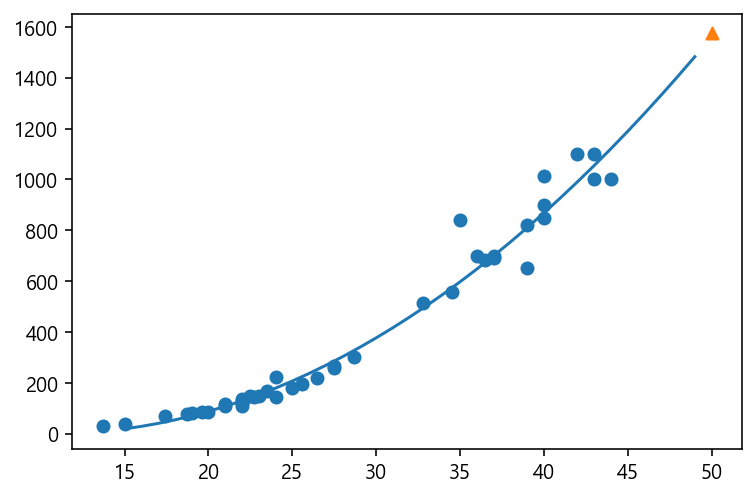

In [103]:
# 구간별 직선 (15~49)
point=np.arange(15,50)
#train set의 산점도
plt.scatter(X_train,y_train)
# 회귀 방정식
plt.plot(point,1.01*point**2-21.6*point+116.05)

#50cm 농어 데이터
plt.scatter([50],[1574],marker='^')


In [104]:
print(lr.score(train_poly,y_train))
print(lr.score(test_poly,y_test))

0.9706807451768623
0.9775935108325121


In [105]:
df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [106]:
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [107]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
    perch_full,perch_weight,random_state=42)

## 사이킷런의 변환기

In [108]:
from sklearn.preprocessing import PolynomialFeatures

**PolynomialFeatures()**
- 각 특성을 제곱한 항을 추가하고 특성끼리 곱한 항을 추가하는 함수

In [110]:
poly= PolynomialFeatures()
# fit -> 새롭게 만들 특성 조합을 찾음
poly.fit([[2,3]])
# transform-> 실제 데이터로 변환
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


In [111]:
# 절편에 곱해지는 1 제거
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [112]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(x_train)
train_poly=poly.transform(x_train)
print(train_poly.shape)

(42, 9)


In [114]:
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [115]:
test_poly = poly.transform(x_test)

In [117]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly,y_train)
print(lr.score(train_poly,y_train))
print(lr.score(test_poly,y_test))

0.9903183436982126
0.9714559911594143


In [118]:
## 특성(feature) 추가 degree(차수)=5
poly = PolynomialFeatures(degree=5,include_bias=False)
poly.fit(x_train)
train_poly=poly.transform(x_train)
test_poly = poly.transform(x_test)
print(train_poly.shape)

(42, 55)


In [119]:
lr.fit(train_poly,y_train)
lr.score(train_poly,y_train)

0.999999999998714

In [120]:
#feature의 갯수가 sample에 비해 많으면
#train set에 너무 과적합되어서 test set에서 큰 오류가 뜸
print(lr.score(test_poly,y_test))

-144.4066764700865


### 규제(regularzation)

- 머신러닝 모델이 train set을 너무 과하게 학습하지 못하도록 훼방 하는것
- overfitting을 방지하는 것을 말함
- 선형 회귀 모델의 경우 특성에 곱해지는 계수(or 기울기)의 크기를 작게 만드는 일을 뜻함

In [123]:
from sklearn.preprocessing import StandardScaler
stds = StandardScaler()
stds.fit(train_poly)
train_scaled= stds.transform(train_poly)
test_scaled = stds.transform(test_poly)

__릿지(Ridge)__

- 계수를 제곱한 값을 기준으로 규제를 적용
- 제곱합을 최소화 하기 때문에 계수의 크기가 줄어듦 -> overfitting 방지
- 다중공산성이 분산되기 때문에 효과적
- 딥 러닝 손실함수에서 L2 panelty로 사용  
- 모델 객체를 만들 때 alpha 매개변수로 규제의 강도를 조정


__라쏘(lasso)__

- 계수의 절댓값을 기준으로 규제를 적용
- 가중치가 0에 수렴함
- 기여도가 높은 특정변수의 계수가 커지는 단점이 있음
- 딥 러닝 손실함수에서 L1 panelty로 사용됨

In [124]:
# Ridge model
from sklearn.linear_model import Ridge
ridge = Ridge()

In [125]:
ridge.fit(train_scaled,y_train)
print(ridge.score(train_scaled,y_train))
print(ridge.score(test_scaled,y_test))

0.9896101671037343
0.9790693977615391


In [127]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

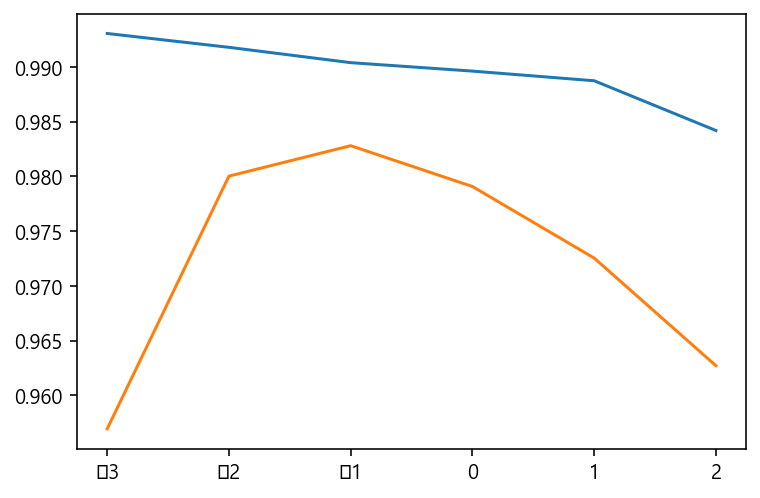

In [128]:
#10**-1일때 train set의 점수가 가장 높으므로 0.1을 alpha로 지정
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [129]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386989


In [130]:
##lasso model
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(train_scaled,y_train)
print(lasso.score(train_scaled,y_train))
print(lasso.score(test_scaled,y_test))

0.989789897208096
0.9800593698421886


In [133]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

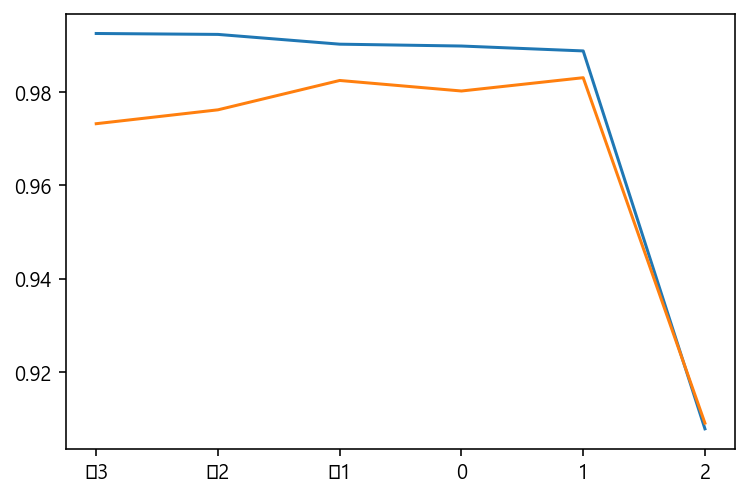

In [134]:
# 과대 적합에서 과소적합으로 떨어지는 지점인 10을 alpha로 지정
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [135]:
lasso=Lasso(alpha=10)
lasso.fit(train_scaled,y_train)
print(lasso.score(train_scaled,y_train))
print(lasso.score(test_scaled,y_test))

0.9888067471131867
0.9824470598706695


In [136]:
#lasso를 사용해 0으로 만든 feature의 갯수 --> 40개
print(np.sum(lasso.coef_==0))

40
